In [12]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# 加载数据集
def load_data(data_path):
    points = np.loadtxt(data_path)
    return points

In [14]:
data = load_data('../know_user_kmeans.txt')
print(data.shape)

(112, 4163)


In [15]:
data_MDS = MDS(n_components=2).fit_transform(data)

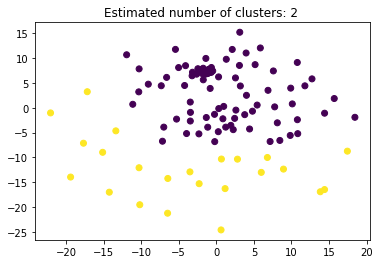

In [16]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = 2,threshold = 0.3, branching_factor = 20).fit_predict(data_MDS)
plt.scatter(data_MDS[:, 0], data_MDS[:, 1], c=y_pred)
plt.title('Estimated number of clusters: %d '% len(set(y_pred)))
plt.savefig('img/MDS_BIRCH.svg',dpi=1000) #指定分辨率保存
plt.show()

In [6]:
from sklearn.cluster import DBSCAN  # 进行DBSCAN聚类
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score ,calinski_harabasz_score,davies_bouldin_score # 计算 轮廓系数，CH 指标，DBI 
 

s1=silhouette_score(data, y_pred, metric='euclidean') # 计算轮廓系数
s2=calinski_harabasz_score(data,y_pred) # 计算CH score
s3=davies_bouldin_score(data,y_pred)    # 计算 DBI

print(s1)
print(s2)
print(s3)

0.15557475460466932
13.239154524478318
2.6661672359611805


In [7]:
# 使用TSNE进行降维处理。从1000维降至2维。
tsne = TSNE(n_components=2, learning_rate=50).fit_transform(data_MDS)

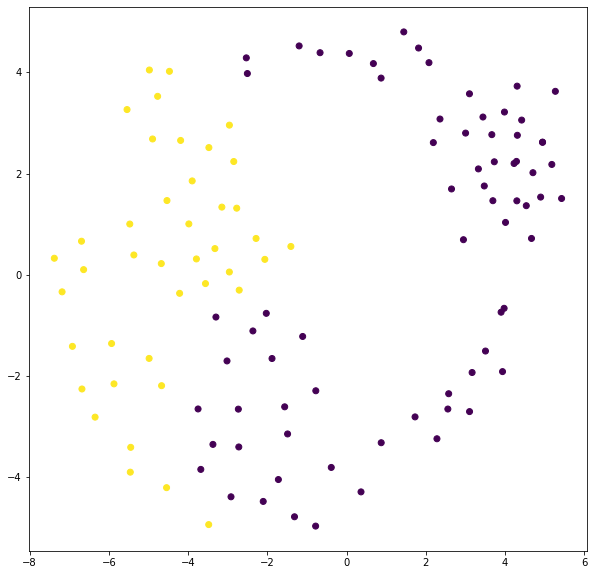

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_pred)
plt.show()

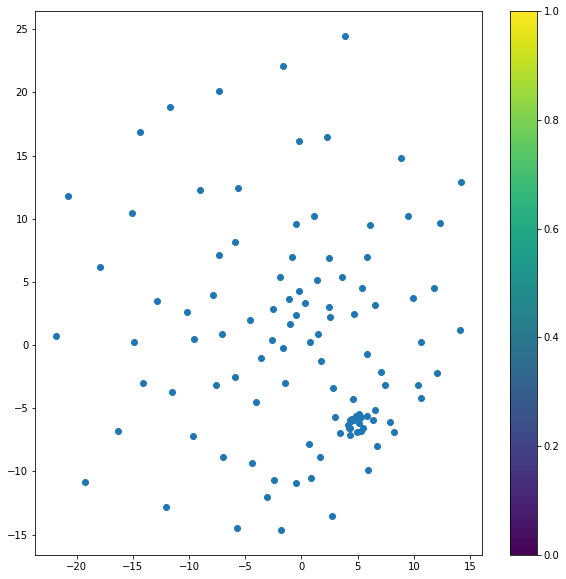

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(2)
plt.scatter(data_MDS[:, 0], data_MDS[:, 1])
plt.colorbar()#使用这一句就可以分辨出，颜色对应的类了！神奇啊。
plt.show()

In [10]:
# 评价
from evaluation import E

e = E(data, y_pred)

CH: 13.239154524478318
DBI: 2.6661672359611805


In [11]:
def cal_sp(data, predict):
    x_count = 0
    y_count = 0
    x = 0
    y = 0
    for i in range(len(predict)):
        if predict[i] == 0:
            x_count += 1
            x += data[i]
        elif predict[i] == 1:
            y_count += 1
            y += data[i]
    print(x/x_count)
    print(y/y_count)
    
        
    for i in range(len(predict)):
        cp_x = 0
        cp_y = 0
        if predict[i] == 0:
             cp_x += (data[i] - x)
        cp_x = cp_x/x_count
        if predict[i] == 1:
            cp_y += (data[i] - y)
        cp_y = cp_y/y_count
        cp = (cp_x + cp_y).sum()/2
    print('cp',cp)
    print('sp',((x/x_count-y/y_count)**2).sum())    
cal_sp(data_MDS, y_pred)

[ 0.66771819 -4.90937598]
[-1.15629247  8.5016023 ]
cp 2.1069604257091186
sp 183.18135330092906
